In [3]:
import dask.dataframe as dd
import pandas as pd
from datetime import datetime, timedelta
exec(open("./lib/splitter.py").read())
exec(open("./lib/distance.py").read())

In [4]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [5]:
date = datetime.strptime('2000-01-01', "%Y-%m-%d")
inputFile = './data/splitted/out_2019-12-19.csv'
df = pd.read_csv(inputFile)

In [6]:
df.tail()

,pid,hid,lat,lon,ts,td,dw,tz,gridX,gridY,gridId
10556720,Santa Clara County,cd54ed2c53366803fd0080726db43586ac8e5afd,37.444111,-121.890795,1576768843,07:20:43,Thu,397,8441,6092,844106092
10556721,Santa Clara County,cd54ed2c53366803fd0080726db43586ac8e5afd,37.445117,-121.891009,1576768845,07:20:45,Thu,397,8451,6090,845106090
10556722,Santa Clara County,cd54ed2c53366803fd0080726db43586ac8e5afd,37.443603,-121.890679,1576768847,07:20:47,Thu,397,8436,6093,843606093
10556723,Santa Clara County,cd54ed2c53366803fd0080726db43586ac8e5afd,37.443088,-121.890577,1576768849,07:20:49,Thu,397,8431,6094,843106094
10556724,Santa Clara County,cd54ed2c53366803fd0080726db43586ac8e5afd,37.442045,-121.890382,1576768851,07:20:51,Thu,397,8420,6096,842006096


In [7]:
df.columns

Index(['pid', 'hid', 'lat', 'lon', 'ts', 'td', 'dw', 'tz', 'gridX', 'gridY',
       'gridId'],
      dtype='object')

In [8]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.relplot(x="gridX", y="gridY", ax=ax, data=df);

Error in callback <function flush_figures at 0x0000019EAA2D45E8> (for post_execute):


KeyboardInterrupt: 

In [13]:
len(df.hid.unique())

126590

In [14]:
df.shape

(10556725, 11)

In [15]:
hidCounts = df.hid.value_counts()
hidCounts.sort_values(ascending=False, inplace=True)

In [16]:
hidCounts

6331cb323d121b738ebe80f0ca18c562a39b2afa    5668
b270696f3fe5ecb0c30b7e6b8f7995ef4665c53e    5229
fa5dfb20d1b786bc76a3aa9a822058a5eb3c5429    5109
5d29c6ac717bdcff2e37208d8b0789f7c7526bbf    4744
fb6b303dd4e8b2cd1ebed5414a85936f8bf9bbc4    4388
                                            ... 
d70fda028974f14757ea6eadf6b7ae1a7394185d       1
e9b9628508c782dabe57563e11c23acf8dda725e       1
f43b7065f20d71cf5dde27a52bb0bf1afc64ea3b       1
d9dae3e11f2c382c7181abd6c99d2204f64f8f9c       1
849ea98240b743b3d707e87a86560e2c737d925a       1
Name: hid, Length: 126590, dtype: int64

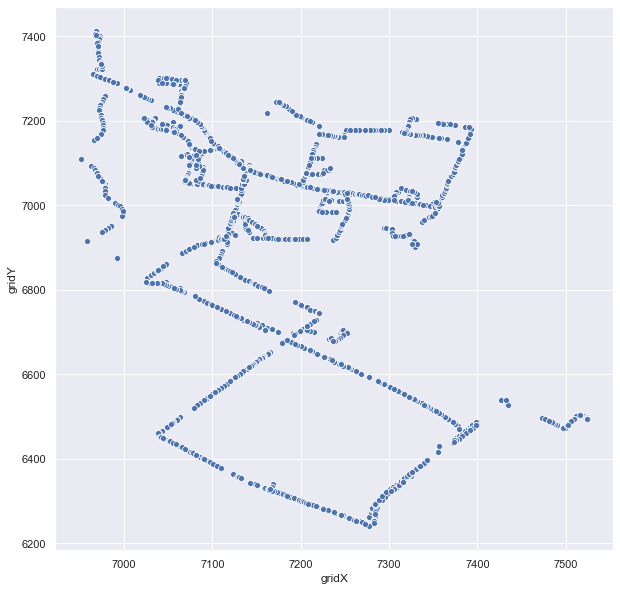

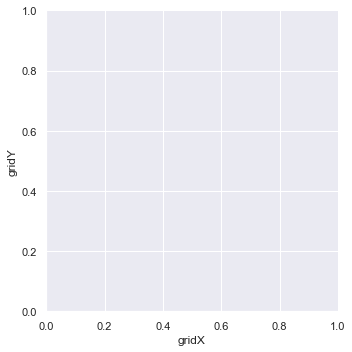

In [24]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.relplot(x="gridX", y="gridY", ax=ax, data=df.loc[df.hid == hidCounts.index[1]]);

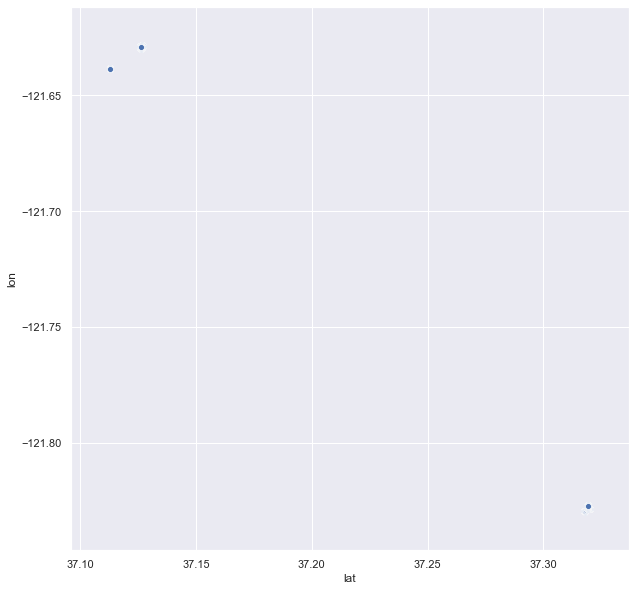

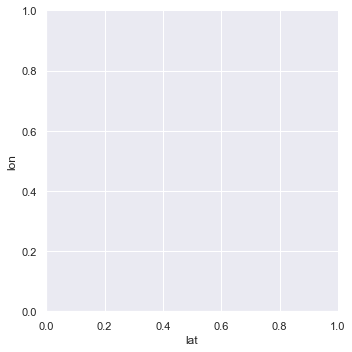

In [22]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.relplot(x="lat", y="lon", ax=ax, data=df.loc[df.hid == hidCounts.index[1]]);

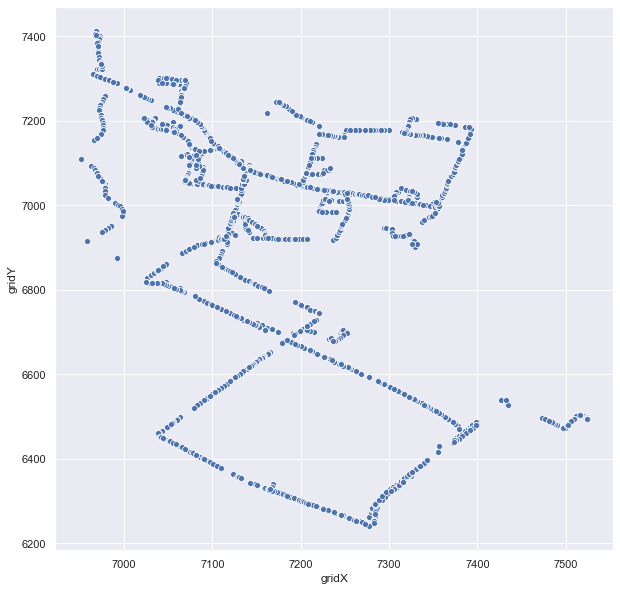

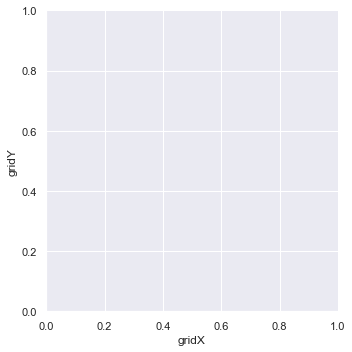

In [18]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.relplot(x="gridX", y="gridY", ax=ax, data=df.loc[df.hid == hidCounts.index[1]]);

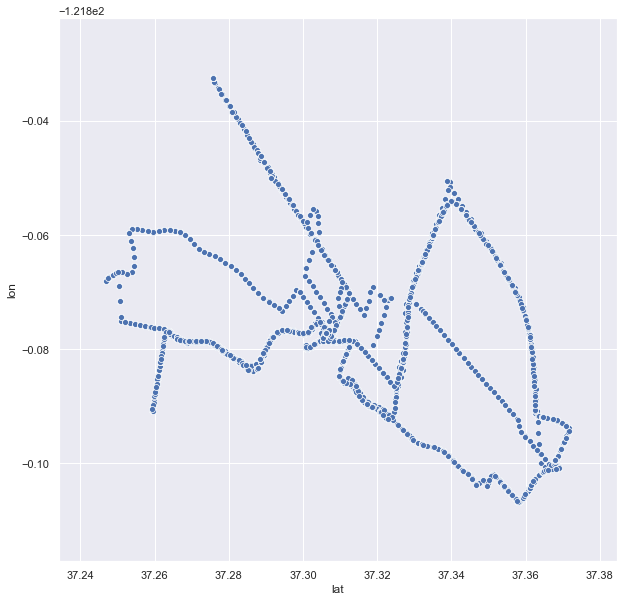

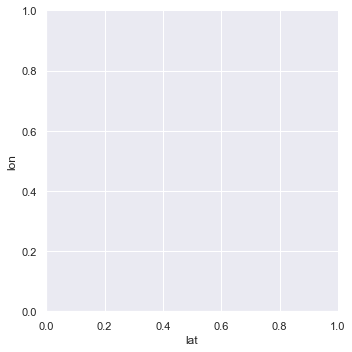

In [19]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.relplot(x="lat", y="lon", ax=ax, data=df.loc[df.hid == hidCounts.index[2]]);

In [25]:
df2 = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})

In [26]:
df2.groupby(['Animal'])